***HDB Resale Price Index***

There are 123 rows and 2 columns in this dataset
The names of the columns are: 
- quarter <U10 0 nulls
- index float64 0 nulls
 
There are 123 unique values in quarter
There are 109 unique values in index


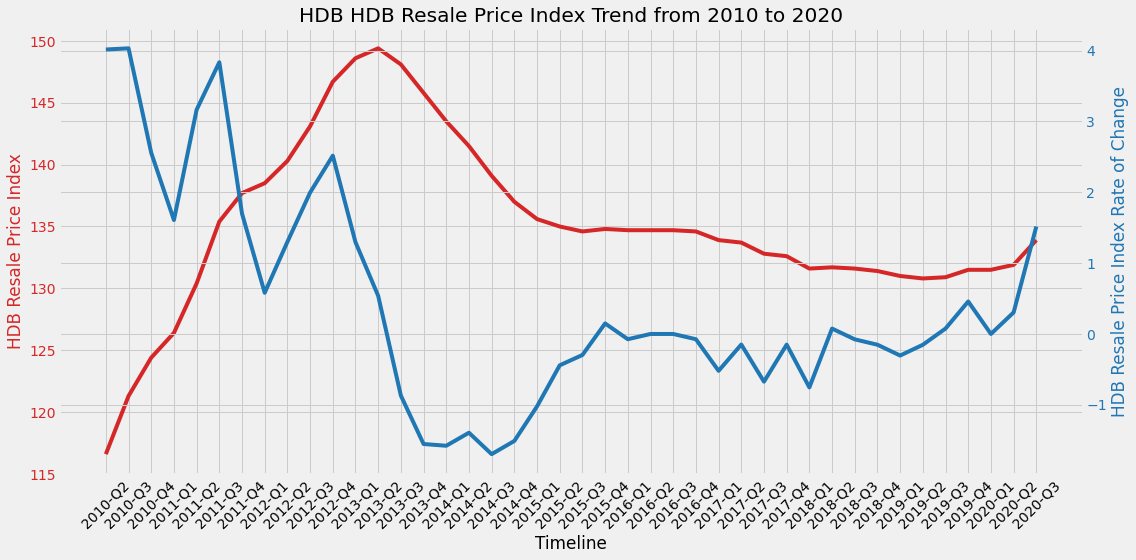

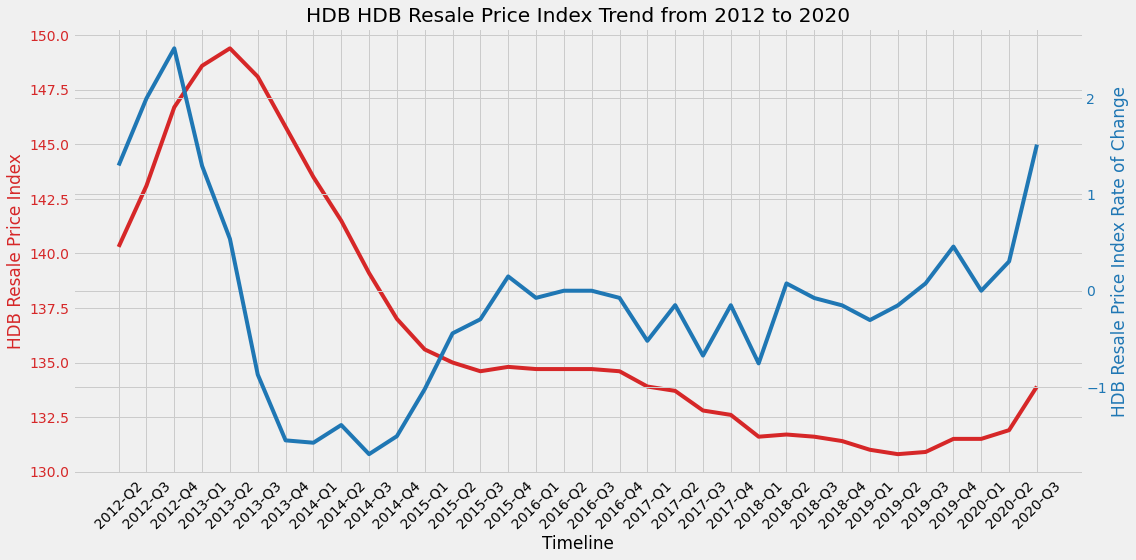

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.recfunctions import append_fields

#dataset taken from https://data.gov.sg/dataset/hdb-resale-price-index
title = "HDB Resale Price Index"
titlelen = len(title)
print("{:*^{titlelen}}".format(title, titlelen=titlelen+6))
print()

filename = 'datasets/hdb-resale-price-index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv'

df = np.genfromtxt(filename, skip_header=1, dtype=[('quarter','U10'), ('index','f8')],
    delimiter=",", missing_values=['na','-'],filling_values=[0])

def check_nan(array, type_):
    if str(type_) == '<U10':
        return ([c.isnumeric() for c in list(array)].count(True))
    elif str(type_) == 'float64':
        return (list(np.isnan(array)).count(True))
    
print("There are {} rows and {} columns in this dataset".format(df.shape[0],len(df.dtype) ) )
print("The names of the columns are: ")
list_col = list(df.dtype.names)

for i,v in enumerate(list_col):
    print("- " + str(v), df.dtype[i], str(check_nan(df[v],df.dtype[i])) + " nulls")
print (" ")
for i,v in enumerate(list_col):
    print("There are {} unique values in {}".format(len(np.unique(df[v])), v))

def lineplot (x = 2010, y = 2020 ):
    years = [x[0:4] for x in list(df['quarter'])]  #spliting the first 4 characters of quarter, which is the year
    data = append_fields(df,'years',years, 
                         usemask=False,dtypes = "U10")  # create a new column in the dataframe,labelled as years

    range_years_int = np.arange(x,y+1,1)  #produce the range of years using numpy 
    range_years = [str(x) for x in list(range_years_int)] #transform the years to string

    select = data[np.isin(data['years'],list(range_years))] #select only the range_years
    cpi = np.array(select['index']) # #selecting the  only the range_years
    internal_rate_change = (np.diff(cpi) / cpi[:-1]) * 100. # computing the internal rate of change

    plt.style.use("fivethirtyeight") #selecting a plt style
    fig, ax1 = plt.subplots(figsize=(16,8))

    color = 'tab:red'
    ax1.set_xlabel('Timeline')
    ax1.set_ylabel('HDB Resale Price Index', color=color)
    #creating simple trend using select. Notice ['quarter'][1:] so as to coincide with ax2 (see below)
    ax1.plot(select['quarter'][1:],select['index'][1:],color=color) 
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() #creating 2 y-axis with different scale, while the a-axis remain

    color = 'tab:blue'
    ax2.set_ylabel('HDB Resale Price Index Rate of Change', color=color)  
    # creating the second trend (internal rate of change)
    ax2.plot(select['quarter'][1:],internal_rate_change,color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45) #setting the properties of the plot
    plt.title('HDB HDB Resale Price Index Trend from {} to {}'.format(x, y ))

    fig.tight_layout() 
    plt.show()
    
# by default, the lineplot function will return you the CPI trend from 2010 to 2020
lineplot()

# select between 1990 to 2020
lineplot(2012,2020)